In [798]:
import pandas as pd
import numpy as np
from math import exp


In [799]:
data = pd.read_csv('final.csv')
data.head()
val = data['species'].values

In [800]:
numeric = []
for i in val:
    if i=='setosa':
        numeric.append(0)
    else:
        numeric.append(1)

In [801]:
data['Species'] = numeric

In [802]:
data = data.drop(['species'],axis=1)

In [803]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Ans 1(1)

In [804]:
def logistic_regression_gd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))] 
    for epoch in range(n_epoch):
        for row in train:
            yhat1 = coef[0]
            for i in range(len(row)-1):
                yhat1 += coef[i + 1] * row[i]
            yhat = 1.0 / (1.0 + exp(-yhat1))
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coef

In [805]:
data1 = data.drop(['sepal_width','petal_length'],axis = 1)
train = data1.values
l_rate = .1
n_epoch =10000
x = logistic_regression_gd(train,l_rate,n_epoch)

In [806]:
x 

[-4.923767536394403, -1.3404347718737768, 15.757715910508788]

In [807]:
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))
pre = []
for i in train:
        pre.append(round(predict(i,x)))
xz = np.array(pre)
#np.unique_counts(xz)
xz

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [808]:
data['Species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [809]:
acc1 = accuracy_score(data['Species'].values,xz)
print("Coefficient of the model : ",x)
print("Accuracy of my own model : ",acc1)

Coefficient of the model :  [-4.923767536394403, -1.3404347718737768, 15.757715910508788]
Accuracy of my own model :  1.0


In [810]:
x_ = data['sepal_length'].values

In [811]:
data1.head()

,sepal_length,petal_width,Species
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0


<IPython.core.display.Javascript object>


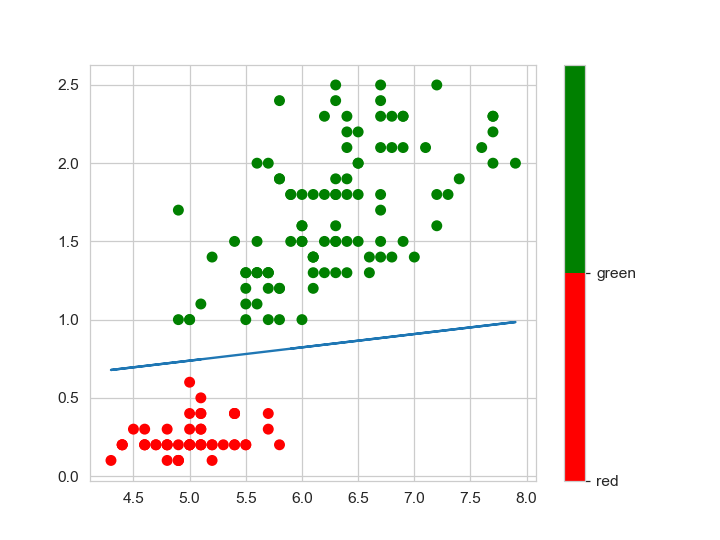

In [757]:
import matplotlib
colors = ['red','green']
plt.scatter(data['sepal_length'].values,data['petal_width'].values,c = data['Species'], cmap=matplotlib.colors.ListedColormap(colors))
y_ = -(x[0] + x[1]*x_)/x[2]
cb = plt.colorbar()
loc = np.arange(0,max(data['Species'].values),max(data['Species'].values)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)
plt.plot(x_, y_)

In [758]:
x_

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [352]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

In [812]:
data2 = data1
data2['x'] = 1

In [813]:
data2['species'] = data2['Species'].values

In [814]:
data2 = data2.drop(['Species'],axis =1)

In [815]:
data2.head()

,sepal_length,petal_width,x,species
0,5.1,0.2,1,0
1,4.9,0.2,1,0
2,4.7,0.2,1,0
3,4.6,0.2,1,0
4,5.0,0.2,1,0


In [816]:
model = LR()
model.fit(data2[['sepal_length','petal_width','x']],data2['species'])
pred = model.predict_proba(data2[['sepal_length','petal_width','x']])[:, 1]
prediction = model.predict(data2[['sepal_length','petal_width','x']])

C:\Users\karan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [764]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [765]:
pred

array([0.08970035, 0.09456727, 0.09966935, 0.10231113, 0.09210493,
       0.18227227, 0.15186844, 0.09210493, 0.10778128, 0.06233408,
       0.08282293, 0.09708841, 0.06405668, 0.07335279, 0.07439967,
       0.16961978, 0.18227227, 0.1340615 , 0.11505571, 0.1340615 ,
       0.08282293, 0.19564619, 0.10231113, 0.27648844, 0.09708841,
       0.09210493, 0.20026602, 0.08735251, 0.08735251, 0.09966935,
       0.09708841, 0.18227227, 0.0574225 , 0.08063915, 0.06233408,
       0.09210493, 0.08063915, 0.06233408, 0.10778128, 0.08970035,
       0.13747566, 0.15565459, 0.10778128, 0.38200073, 0.19564619,
       0.14452322, 0.08970035, 0.10231113, 0.08506037, 0.09210493,
       0.92765609, 0.95998282, 0.95400396, 0.92662246, 0.95884988,
       0.92256584, 0.97487606, 0.79497351, 0.90166306, 0.95585003,
       0.79018995, 0.96521286, 0.73790006, 0.94338066, 0.92461921,
       0.93330028, 0.9680279 , 0.74899889, 0.96215965, 0.83247376,
       0.99079219, 0.91383101, 0.96108584, 0.87096875, 0.90670

In [766]:
x11 = model.coef_
acc = accuracy_score(prediction,data1['Species'].values)

In [767]:
print("Coefficient of the model : ",x11)
print("Accuracy of the SKLEARN implemented Model : ",acc)

Coefficient of the model :  [[-0.29098829  4.5178389  -0.86841334]]
Accuracy of the SKLEARN implemented Model :  1.0


## Neural Network

In [828]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [829]:
input_vector = np.array(input_vector, ndmin=2).T
print(input_vector, input_vector.shape)

[[ 2]
 [ 4]
 [11]] (3, 1)


### Neural Network Class

In [830]:
import math
class NeuralNetwork1:
    
    def __init__(self, x, y,h,archi):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,2)
        self.weights3   = np.random.rand(2,1)
        #print(self.weights2)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
       # print(self.weights2)
    def ReLU(x):
        return abs(x) * (x > 0)

    def sigmoid(x):
          return 1 / (1 + math.exp(-x))
    def calculate_op(self,x,y,fun):
        op1 = np.matmul(x,self.weights1)
        f = fun[0] 
        op1 = sigmoid(op1)
        op2 = np.matmul(op1,self.weights2)
        op2 = ReLU(op2)
        op3 = np.matmul(op2,self.weights3)
        op3 = ReLU(op3)
        print(op3)

if __name__ == "__main__":   
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    fun = ["Relu"]
    h = 3
    archi = [4,2,1]
    nn = NeuralNetwork1(X,y,h,archi)
    nn.calculate_op(X,y,fun)

[[0.78982317]
 [0.99756479]
 [0.9316822 ]
 [1.09926482]]


In [831]:
X = data[['sepal_length','petal_width']].values
y = data['Species'].values
y = y.reshape(-1,1)

### Backward and Forward Propagation

In [834]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)
m,m1 = 100,120

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        #print(self.weights1)
        self.weights2   = np.random.rand(4,2)
        self.weights3   = np.random.rand(2,1) 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
       # print(self.layer1)
       # print(self.weights2)
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer2, self.weights3))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights3 = np.dot(self.layer2.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        print(self.weights1)
        print(self.output.T)
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output.T), self.weights2) * sigmoid_derivative(self.layer1)))
        

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2


if __name__ == "__main__":
    X = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
    y = np.array([[0],[1],[1],[0]])
    nn = NeuralNetwork(X,y)

    for i in range(1500):
        nn.feedforward()
        nn.backprop()

[[0.39043219 0.4920708  0.54694137 0.11123245]
 [0.15068041 0.30767436 0.28371891 0.04287791]]
[[0.66371441 0.66744672 0.67078259 0.67366442]]


ValueError: operands could not be broadcast together with shapes (4,2) (4,4) 

In [773]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        #print(self.weights1)
        self.weights2   = np.random.rand(4,1)
        #self.weights3   = np.random.rand(2,1) 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        #self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        return self.weights1,self.weights2

if __name__ == "__main__":
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    nn = NeuralNetwork(X,y)

    for i in range(1500):
        b =  nn.feedforward()
        z =  nn.backprop()

    print("Weight for the first layer :",z[0])
    print("Weight for the second layer :",z[1])
    print("output of the model : ",b)

Weight for the first layer : [[ 2.4942521   5.33860992  6.48827161 -3.42981909]
 [ 2.46202629  5.33213773 -3.15038803  6.48479374]
 [ 1.33150101 -0.93059557  0.39936146  0.6782091 ]]
Weight for the second layer : [[ 3.54453673]
 [ 8.26606079]
 [-7.70617393]
 [-7.70558356]]
output of the model :  [[0.01013544]
 [0.96981444]
 [0.96995028]
 [0.03738251]]


### Using Greadient descent 

In [774]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        #print(self.weights1)
        self.weights2   = np.random.rand(4,1)
        #self.weights3   = np.random.rand(2,1) 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        #self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * gd(sigmoid_derivative(self.output))))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * gd(sigmoid_derivative(self.output)), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        return self.weights1,self.weights2
    def gd(X):
        for j in xrange(60000):
            layer_1 = 1/(1+np.exp(-(np.dot(X,synapse_0))))
            layer_2 = 1/(1+np.exp(-(np.dot(layer_1,synapse_1))))
            layer_2_delta = (layer_2 - y)*(layer_2*(1-layer_2))
            layer_1_delta = layer_2_delta.dot(synapse_1.T) * (layer_1 * (1-layer_1))
            synapse_1 -= (alpha * layer_1.T.dot(layer_2_delta))
            synapse_0 -= (alpha * X.T.dot(layer_1_delta))
#if __name__ == "__main__":

## ANS 3

In [775]:
d1 = pd.read_csv('mnist_train.csv')

In [776]:
#d1 = d1.head(100)
y = d1['label'].values
X = d1.drop(['label'],axis=1).values
y1 = y[:6000]
y2 = y[:6000]

In [777]:
y = y.reshape(-1,1)
x = np.random.shuffle(y2)
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [778]:
y2

array([2, 9, 5, ..., 3, 2, 4], dtype=int64)

In [788]:
import numpy as np
m = 100
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)
def softmax(x):
    return 1/(1+np.exp(-x))
def softmax_derivative(x):
    return (np.exp(x)/pow((1+np.exp(x)),2))
dt = np.random.random(1)[0]
#dt = np.random(0,1)
vc = m*dt
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        print(self.weights1.shape)
        self.weights2   = np.random.rand(4,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1 = softmax(np.dot(self.input, self.weights1))
        #self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = softmax(np.dot(self.layer1, self.weights2))
        return self.output,vc
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * softmax_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * softmax_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        return self.weights1,self.weights2

if __name__ == "__main__":
    nn = NeuralNetwork(X,y)
    for i in range(10):
        print("epoch : ",i)
        b =  nn.feedforward()
        z =  nn.backprop()

    print("Weight for the first layer :",z[0])
    print("Weight for the second layer :",z[1])
    print("Accuracy of the model : ",b[1])

(784, 4)
epoch :  0
epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5
epoch :  6
epoch :  7
epoch :  8
epoch :  9
Weight for the first layer : [[0.05249338 0.85542973 0.90441153 0.52118676]
 [0.18945048 0.0384835  0.47371817 0.71480751]
 [0.06832876 0.28411086 0.85471123 0.02438399]
 ...
 [0.44902963 0.57352712 0.97225385 0.2424261 ]
 [0.83044545 0.51326612 0.68495849 0.32082899]
 [0.28186379 0.52721888 0.96056273 0.81027202]]
Weight for the second layer : [[822761.57217365]
 [822762.13406679]
 [822761.83382914]
 [822761.60374197]]
Accuracy of the model :  70.69782680722734


In [ ]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test1 = X_train[:100]
y_test1 = y_train[:100]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1]*X_test1.shape[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_test1 = X_test1/255

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
Y_test1 = np_utils.to_categorical(y_test1, 10)

In [ ]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [732]:
# start building a model
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.2988 - acc: 0.6833 - val_loss: 0.8202 - val_acc: 0.8320
Epoch 2/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.7205 - acc: 0.8414 - val_loss: 0.6105 - val_acc: 0.8614
Epoch 3/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.5892 - acc: 0.8599 - val_loss: 0.5270 - val_acc: 0.8746
Epoch 4/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.5266 - acc: 0.8697 - val_loss: 0.4810 - val_acc: 0.8819
Epoch 5/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.4887 - acc: 0.8755 - val_loss: 0.4508 - val_acc: 0.8862
Epoch 6/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.4625 - acc: 0.8797 - val_loss: 0.4291 - val_acc: 0.8899
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.4432 - acc: 0.8841 - val_loss: 0.4130 - val_acc

In [733]:
score = model.evaluate(X_test, Y_test, verbose=0)  
print('Accuracy of the model:', score[1])

Accuracy of the model: 0.9097


In [734]:
score = model.evaluate(X_test1, Y_test1, verbose=0) # testing on the test data
score[1]

0.94

In [735]:
a_y = []
for i in Y_test:
    loc =np.argmax(i)
    a_y.append(loc)

In [736]:
pre = model.predict(X_test)
y_pred = []
for d in pre:
    loc = np.argmax(d)
    y_pred.append(loc)

In [737]:
#confusion matrix of the model
confusion_matrix(a_y,y_pred)

array([[ 960,    0,    2,    2,    0,    4,    8,    1,    3,    0],
       [   0, 1106,    2,    4,    1,    2,    4,    1,   15,    0],
       [  10,    6,  898,   18,   17,    1,   12,   20,   42,    8],
       [   4,    1,   18,  910,    1,   28,    2,   13,   20,   13],
       [   2,    1,    5,    1,  907,    1,   13,    1,    8,   43],
       [  13,    4,    3,   42,   12,  748,   17,   10,   34,    9],
       [  13,    3,    5,    3,   13,   12,  905,    2,    2,    0],
       [   2,   18,   24,    6,   10,    0,    0,  925,    3,   40],
       [   9,    9,    9,   27,    7,   25,   13,   16,  843,   16],
       [  11,    9,    5,   12,   38,   11,    0,   22,    6,  895]],
      dtype=int64)

# using real estate dataset

In [789]:
data = pd.read_csv('real.csv')

In [790]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [791]:
#d1 = d1.head(100)
y = data['Y house price of unit area'].values
X = data.drop(['Y house price of unit area'],axis=1).values

In [792]:
y = y.reshape(-1,1)

In [793]:
import numpy as np
m = 100
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)
def softmax(x):
    return 1/(1+np.exp(-x))
def softmax_derivative(x):
    return (np.exp(x)/pow((1+np.exp(x)),2))
dt = np.random.random(1)[0]
#dt = np.random(0,1)
vc = m*dt
vc1 = m1*dt
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        print(self.weights1.shape)
        self.weights2   = np.random.rand(4,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        #self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output,vc,vc1
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * softmax_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * softmax_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        return self.weights1,self.weights2

if __name__ == "__main__":
    nn = NeuralNetwork(X,y)

    for i in range(10):
        print("epoch : ",i)
        b =  nn.feedforward()
        z =  nn.backprop()

    print("Weight for the first layer :",z[0])
    print("Weight for the second layer :",z[1])
    print("RMSE of the model : ",b[1])
    print("MAE of the model : ",b[2])

(7, 4)
epoch :  0
epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5
epoch :  6
epoch :  7
epoch :  8
epoch :  9
Weight for the first layer : [[0.09173631 0.31603717 0.79968633 0.75539832]
 [0.30791139 0.4018173  0.10998153 0.73027247]
 [0.76022377 0.1694572  0.28543995 0.73029259]
 [0.4883045  0.27820979 0.67204896 0.7330842 ]
 [0.80096989 0.76147115 0.60465996 0.40580212]
 [0.04430627 0.80338109 0.44452678 0.40719451]
 [0.75514527 0.3912985  0.24443822 0.02110042]]
Weight for the second layer : [[60609.85160901]
 [60609.80500163]
 [60609.37213042]
 [60609.77806111]]
RMSE of the model :  36.64791325682242
MAE of the model :  43.9774959081869
